In [60]:
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from pathlib import Path


# 149. SVM with Scikit-Learn and Python - Classification Part One

In [61]:
df = pd.read_csv(r'F:\DataSpell\data_science_ml_learning\DATA\mouse_viral_study.csv')

In [62]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


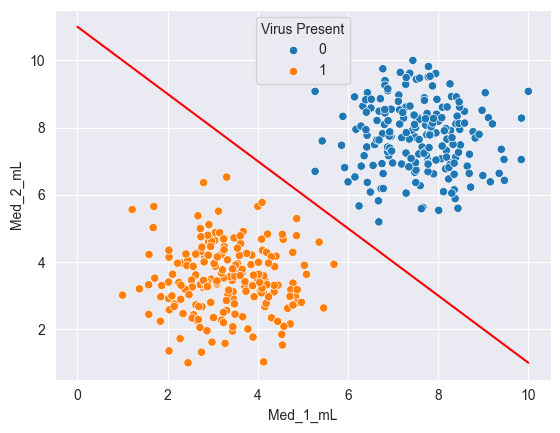

In [63]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

# HYPERPLANE

x = np.linspace(0, 10, 100)

m = -1
b = 11
y = m*x + b

plt.plot(x, y, 'r')

In [64]:
from sklearn.svm import SVC

In [65]:
y = df['Virus Present']

In [66]:
X = df.drop('Virus Present', axis=1)

In [67]:
model = SVC(kernel='linear', C=1_000)

In [68]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [69]:
from svm_margin_plot import plot_svm_boundary

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


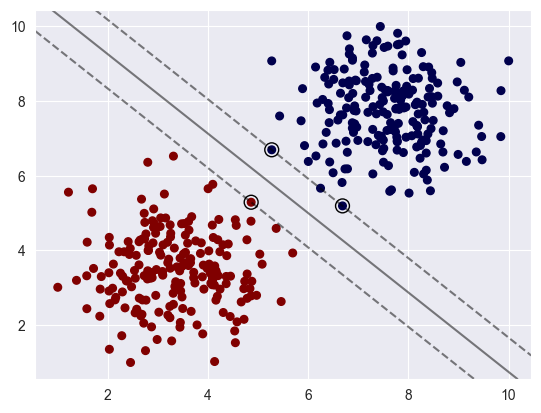

In [70]:
plot_svm_boundary(model, X, y)

In [71]:
X

,Med_1_mL,Med_2_mL
0,6.508231,8.582531
1,4.126116,3.073459
2,6.427870,6.369758
3,3.672953,4.905215
4,1.580321,2.440562
...,...,...
395,2.884122,3.271748
396,7.290855,9.488672
397,7.895325,8.272529
398,2.690592,2.674979


# 150. SVM with Scikit-Learn and Python - Classification Part Two

In [72]:
model = SVC(kernel='linear', C=0.05)

In [73]:
model.fit(X, y)

SVC(C=0.05, kernel='linear')

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


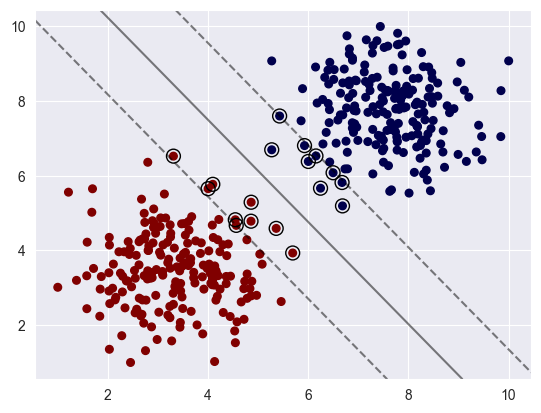

In [74]:
plot_svm_boundary(model, X, y)

In [75]:
model = SVC(kernel='rbf', C=1, gamma=2) 
# default is rbf
# gamma how much influence a single training example has
# gamma is larger the influence is smaller
# when gamma is to large the model is overfitting

In [76]:
model.fit(X, y)

SVC(C=1, gamma=2)

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


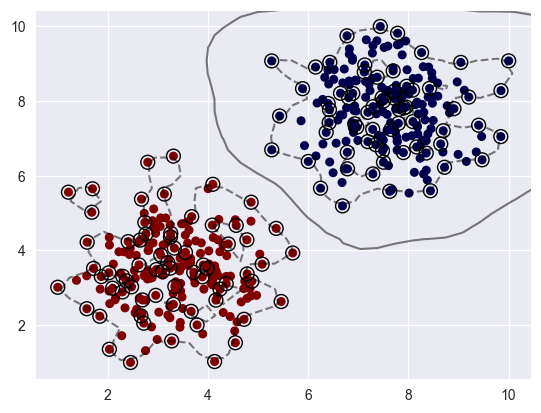

In [77]:
plot_svm_boundary(model, X, y)

In [78]:
model = SVC(kernel='sigmoid')

In [79]:
model.fit(X, y)

SVC(kernel='sigmoid')

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


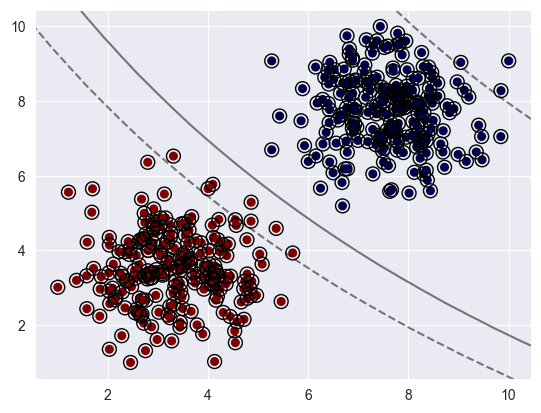

In [80]:
plot_svm_boundary(model, X, y)

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


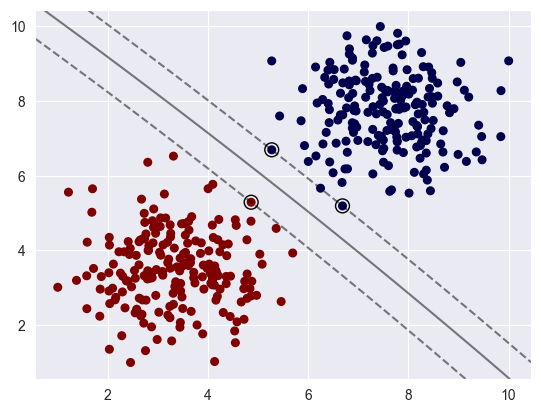

In [81]:
model = SVC(kernel='poly', degree=2)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [83]:
svm = SVC()

In [84]:
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

In [85]:
grid = GridSearchCV(svm, param_grid)

In [86]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [87]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# 151. SVM with Scikit-Learn and Python - Regression Tasks

In [88]:
df_path = r'F:\DataSpell\data_science_ml_learning\DATA\cement_slump.csv'

In [89]:
df = pd.read_csv(df_path)

In [90]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


<Axes: >

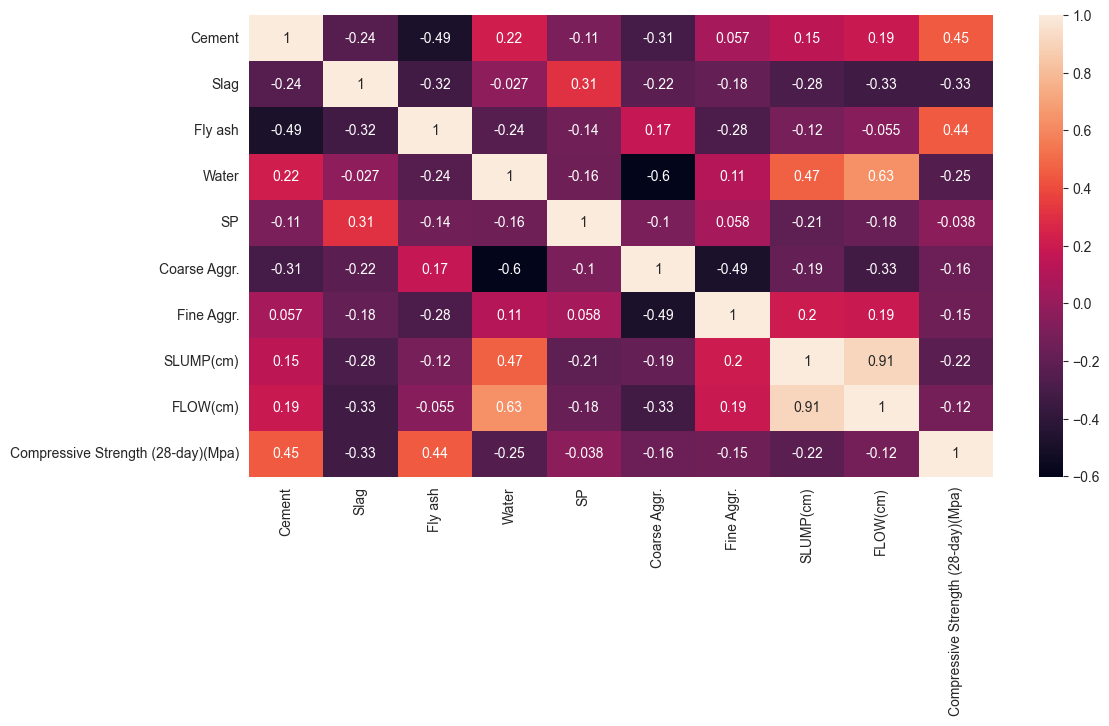

In [91]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)

In [92]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [93]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)

In [94]:
y = df['Compressive Strength (28-day)(Mpa)']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
scaled_X_train = scaler.fit_transform(X_train)

In [100]:
scaled_X_test = scaler.transform(X_test)

In [101]:
from sklearn.svm import SVR, LinearSVR

In [102]:
base_model = SVR()

In [103]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [104]:
base_preds = base_model.predict(scaled_X_test)

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [106]:
mean_absolute_error(y_test, base_preds)

5.236902091259178

In [107]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.695914838327133

In [108]:
mean_squared_error(y_test, base_preds)

44.83527552212948

In [109]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'],
              'degree': [2, 3, 4], 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
svr = SVR()

In [112]:
grid = GridSearchCV(svr, param_grid)

In [113]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [114]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [115]:
grid_preds = grid.predict(scaled_X_test)

In [116]:
mean_absolute_error(y_test, grid_preds)

2.5128012210762365

In [117]:
np.sqrt(mean_squared_error(y_test, grid_preds))

3.178210305119858

In [118]:
mean_squared_error(y_test, grid_preds)

10.10102074357006

# 152. Support Vector Machine Project Overview